In [1]:
#熟悉一些tensor的计算
import numpy as np
matrix_a = np.array([[1,2],[3,4]])
matrix_b = np.array([[5,6,7],[8,9,10],[10,11,12]])

In [2]:
dimension_a = matrix_a.shape
dimension_b = matrix_b.shape

In [3]:
#假设输入的两个矩阵分别是m1*m2和n1*n2，则进行kronecker积得到的新的矩阵的维度是m1n1 * m2*n2
#进行外积计算的结果应该与kronecker积的结果一致(外积是kronecker积的一个特例)
np.kron(matrix_a,matrix_b)

array([[ 5,  6,  7, 10, 12, 14],
       [ 8,  9, 10, 16, 18, 20],
       [10, 11, 12, 20, 22, 24],
       [15, 18, 21, 20, 24, 28],
       [24, 27, 30, 32, 36, 40],
       [30, 33, 36, 40, 44, 48]])

In [4]:
np.outer(matrix_a,matrix_b)

array([[ 5,  6,  7,  8,  9, 10, 10, 11, 12],
       [10, 12, 14, 16, 18, 20, 20, 22, 24],
       [15, 18, 21, 24, 27, 30, 30, 33, 36],
       [20, 24, 28, 32, 36, 40, 40, 44, 48]])

In [5]:
np.kron(matrix_b,matrix_a)
#kronecker积不满足交换律，交换顺序得到的结果维度相同，结果不同

array([[ 5, 10,  6, 12,  7, 14],
       [15, 20, 18, 24, 21, 28],
       [ 8, 16,  9, 18, 10, 20],
       [24, 32, 27, 36, 30, 40],
       [10, 20, 11, 22, 12, 24],
       [30, 40, 33, 44, 36, 48]])

In [6]:
#计算khatri-Rao积：khatri-Rao积的计算方法是对两个输入矩阵展开为列向量分别进行kronecker积运算得到一个矩阵
#要求输入的两个矩阵的列数一致，假设matrix_a：m*k,matrix_b：n*k
#计算得到的新矩阵的维度为：mn * k
matrix_c = np.array([[1,2],[3,4]])
matrix_d = np.array([[5,6],[7,8],[9,10]])
output_dim = [matrix_c.shape[0]* matrix_d.shape[0],matrix_c.shape[1]]
matrix_khatri_Rao = np.empty(output_dim)
for i in range(matrix_c.shape[1]):
    matrix_khatri_Rao[:,i] = np.kron(matrix_c[:,i],matrix_d[:,i])

In [7]:
matrix_khatri_Rao

array([[ 5., 12.],
       [ 7., 16.],
       [ 9., 20.],
       [15., 24.],
       [21., 32.],
       [27., 40.]])

In [8]:
#计算矩阵之间的外积
mat_1 = np.array([[1,2],[3,4]])
mat_2 = np.array([[1,2],[3,4]])

In [9]:
np.multiply.outer(mat_1,mat_2)

array([[[[ 1,  2],
         [ 3,  4]],

        [[ 2,  4],
         [ 6,  8]]],


       [[[ 3,  6],
         [ 9, 12]],

        [[ 4,  8],
         [12, 16]]]])

In [10]:
mat_a = np.array([[1,0,1],[0,1,-1]])
mat_b = np.array([[1,0,1],[0,1,1]])
mat_c = np.array([[1,1,0],[-1,1,1]])

In [11]:
mat_r_1 = np.multiply.outer(mat_a[:,0],np.multiply.outer(mat_b[:,0],mat_c[:,0]))
mat_r_2 = np.multiply.outer(mat_a[:,1],np.multiply.outer(mat_b[:,1],mat_c[:,1]))
mat_r_3 = np.multiply.outer(mat_a[:,2],np.multiply.outer(mat_b[:,2],mat_c[:,2]))

In [12]:
(mat_r_1 + mat_r_2 + mat_r_3).shape

(2, 2, 2)

In [19]:
import matplotlib.pyplot as plt
x = np.arange(10)
#这里写这个例子主要是为了表现tensornetwork的优越之处，contract的操作可以大大地减少参数空间
'''
假设现在存在一个order=5，每个order下mode=k，这个tensor如果可以表示为2个order=2，mode=k以及3个order=3，mode=k的tensor的MPS形式contract组成
反过来我们就相当于将这个大型的tensor进行了分解，分解之后的参数量可以给出一个显然的对比，实验在下方
'''

In [20]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
y = x**5

In [22]:
y

array([    0,     1,    32,   243,  1024,  3125,  7776, 16807, 32768,
       59049], dtype=int32)

In [23]:
z = 2*(x**2)+3*(x**3)

In [24]:
z

array([   0,    5,   32,   99,  224,  425,  720, 1127, 1664, 2349],
      dtype=int32)

In [25]:
fig = plt.figure()

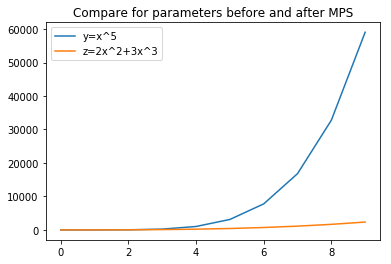

In [29]:
plt.title("Compare for parameters before and after MPS")
plt.plot(x,y,label='y=x^5')
plt.plot(x,z,label='z=2x^2+3x^3')
plt.legend()

In [ ]:
'''
很明显我们从图上可以看出来在进行MPS前后的参数的数量呈现出极大的差异，这就是使用tensor network的一大好处
'''